In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [14]:
########33    for snipping the data
ranges = {
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc1": ("20251013222730","20251013222745"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc2": ("20251013222908","20251013222922"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc3": ("20251013223100","20251013223113"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc4": ("20251013223211","20251013223224"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc5": ("20251013223323","20251013223338"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc6": ("20251013223430","20251013223445"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccc7": ("20251013223545","20251013223559"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccr1": ("20251013223752","20251013223805"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccr2": ("20251013223854","20251013223907"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccr3": ("20251013223924","20251013223939"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/ccr4": ("20251013224125","20251013224139"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/crr1": ("20251013224316","20251013224331"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/crr2": ("20251013224536","20251013224550"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/crr3": ("20251013224704","20251013224715"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/crr4": ("20251013224802","20251013224824"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rrr1": ("20251013224955","20251013225006"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rrr2": ("20251013225056","20251013225108"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rrr3": ("20251013225150","20251013225200"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rrr4": ("20251013225235","20251013225247"),
    "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rrr5": ("20251013225455","20251013225507")
}

# Function to parse the last column timestamp
def parse_timestamp(ts_str):
    return datetime.strptime(ts_str[:14], "%Y%m%d%H%M%S")

# Path to your input txt file
input_file = "/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/rpi2_3drone_1310.txt"

# Read all lines from the input file
with open(input_file, "r") as f:
    lines = f.readlines()

# Process and write each file based on its time range
for filename, (start_str, end_str) in ranges.items():
    start_time = datetime.strptime(start_str, "%Y%m%d%H%M%S")
    end_time = datetime.strptime(end_str, "%Y%m%d%H%M%S")

    with open(filename, "w") as outfile:
        for line in lines:
            try:
                ts_str = line.strip().split(",")[-1]
                current_time = parse_timestamp(ts_str)
                if start_time <= current_time <= end_time:
                    outfile.write(line)
            except Exception as e:
                print(f"Error parsing line: {line.strip()} — {e}")

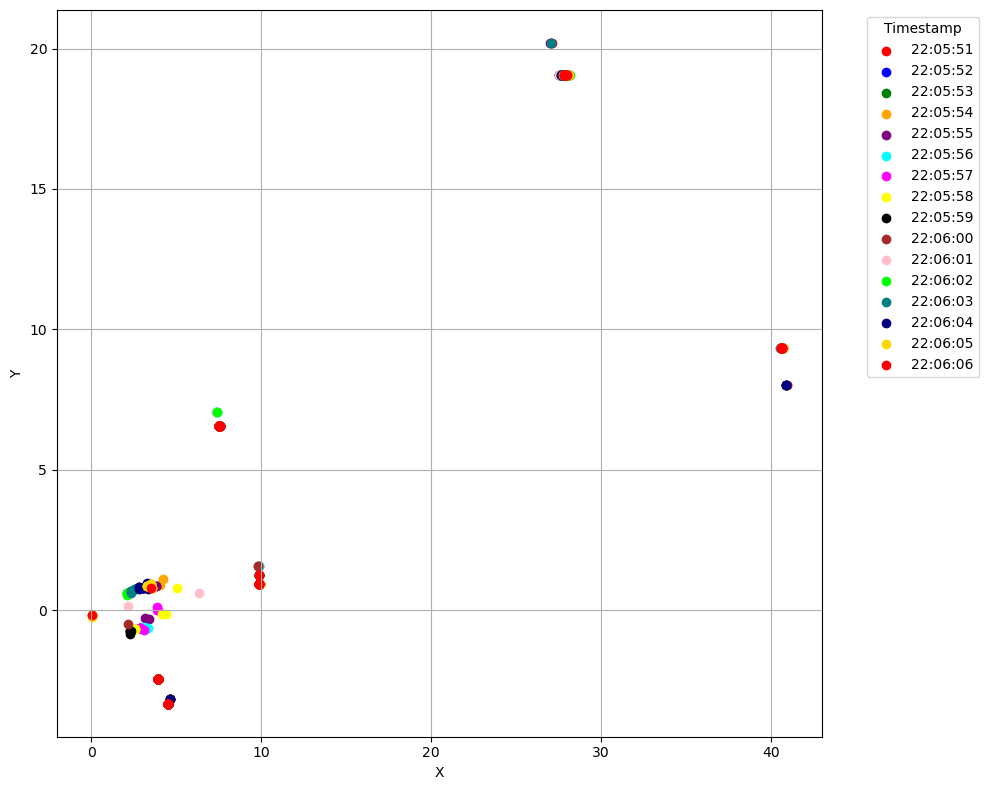

In [258]:

#                              SINGLE RADAR DATA   PLOT   with doppler

# Load the TXT file
file_path = '/home/koushikk/Master_Thesis/30sep/30-09-25/rpi2/ccs3'
data = pd.read_csv(file_path, header=None)

# Extract relevant columns
data = data.iloc[:, [3, 4, 5, -1]]  # Keep only c4 (X), c5 (Y), c6 (Z), last (Time)
data.columns = ['X', 'Y', 'Z', 'Time']

# Convert 'Time' to datetime (from integer strings like 20240428151230)
data['Time'] = data['Time'].apply(lambda x: str(int(x)))
data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d%H%M%S')

# Select specific rows (optional)
data = data.iloc[:]

# Create a new string version of time for labels
data['Time_str'] = data['Time'].dt.strftime('%H:%M:%S')

# Extract unique timestamps
timestamps = data['Time'].unique()
timestamps_str = data['Time_str'].unique()  # New array of labels as string

# Define distinct colors
distinct_colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'cyan', 'magenta', 'yellow', 'black', 'brown',
    'pink', 'lime', 'teal', 'navy', 'gold'
]

# Extend colors list if needed
if len(timestamps) > len(distinct_colors):
    colors = (distinct_colors * ((len(timestamps) // len(distinct_colors)) + 1))[:len(timestamps)]
else:
    colors = distinct_colors[:len(timestamps)]

# Plot
plt.figure(figsize=(10, 8))

for i, timestamp in enumerate(timestamps):
    subset = data[data['Time'] == timestamp]
    plt.scatter(subset['X'], subset['Y'], color=colors[i], label=timestamps_str[i])

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend(title='Timestamp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('right.png', dpi=300)
plt.show()


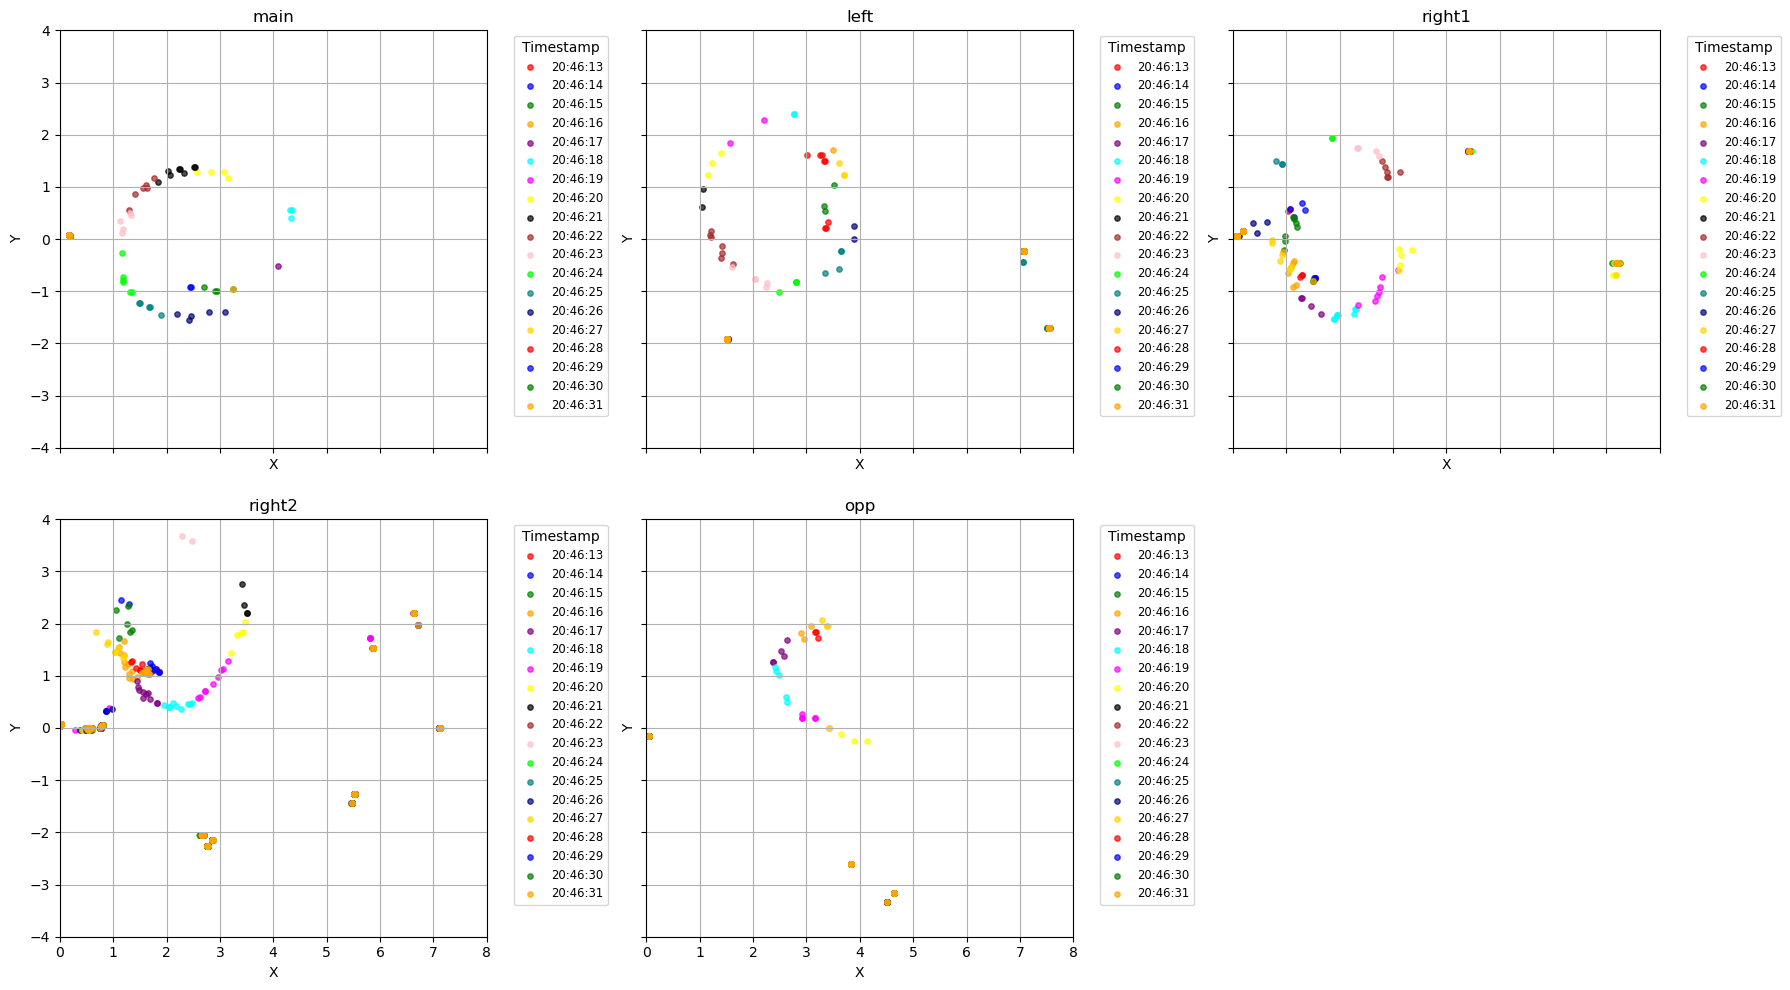

In [29]:
#######################    all plots with doppler
# === Configurable Zoom Ranges ===
# Set to None for auto-scaling
x_range = (0, 8)   # Example: (-1.0, 1.0) or None
y_range = (-4, 4)

# === File paths ===
file_paths = {
    "main": "/home/koushikk/Master_Thesis/30sep/30-09-25/koushik/c8",
    "left": "/home/koushikk/Master_Thesis/30sep/30-09-25/radar1/c8",
    "right1": "/home/koushikk/Master_Thesis/30sep/30-09-25/radar2/c8",
    "right2": "/home/koushikk/Master_Thesis/30sep/30-09-25/rpi1/c8",
    "opp": "/home/koushikk/Master_Thesis/30sep/30-09-25/rpi2/c8"
}

# === Distinct colors for unique timestamps ===
distinct_colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'cyan', 'magenta', 'yellow', 'black', 'brown',
    'pink', 'lime', 'teal', 'navy', 'gold'
]

# === Create 2x3 subplots (only 5 will be used) ===
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, (title, file_path) in enumerate(file_paths.items()):
    ax = axes[i]

    # Load and process data
    data = pd.read_csv(file_path, header=None)
    data = data.iloc[:, [3, 4, 5, -1]]  # X, Y, Z, Time
    data.columns = ['X', 'Y', 'Z', 'Time']

    # Convert time
    data['Time'] = data['Time'].apply(lambda x: str(int(x)))
    data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d%H%M%S')

    # Create string version of time for labels
    data['Time_str'] = data['Time'].dt.strftime('%H:%M:%S')

    # Extract unique timestamps
    timestamps = data['Time'].unique()
    timestamps_str = data['Time_str'].unique()

    # Extend colors if needed
    if len(timestamps) > len(distinct_colors):
        colors = (distinct_colors * ((len(timestamps) // len(distinct_colors)) + 1))[:len(timestamps)]
    else:
        colors = distinct_colors[:len(timestamps)]

    # Plot each timestamp group
    for j, timestamp in enumerate(timestamps):
        subset = data[data['Time'] == timestamp]
        ax.scatter(subset['X'], subset['Y'],
                   color=colors[j],
                   label=timestamps_str[j],
                   alpha=0.7,
                   s=15)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    ax.legend(fontsize='small', title='Timestamp', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Apply zoom ranges if defined
    if x_range:
        ax.set_xlim(x_range)
    if y_range:
        ax.set_ylim(y_range)

# Hide the last (6th) subplot if not used
if len(file_paths) < len(axes):
    axes[-1].axis('off')

# === Layout adjustment ===
plt.tight_layout()
# plt.savefig("hover_plot_by_timestamp.png", dpi=300)
plt.show()


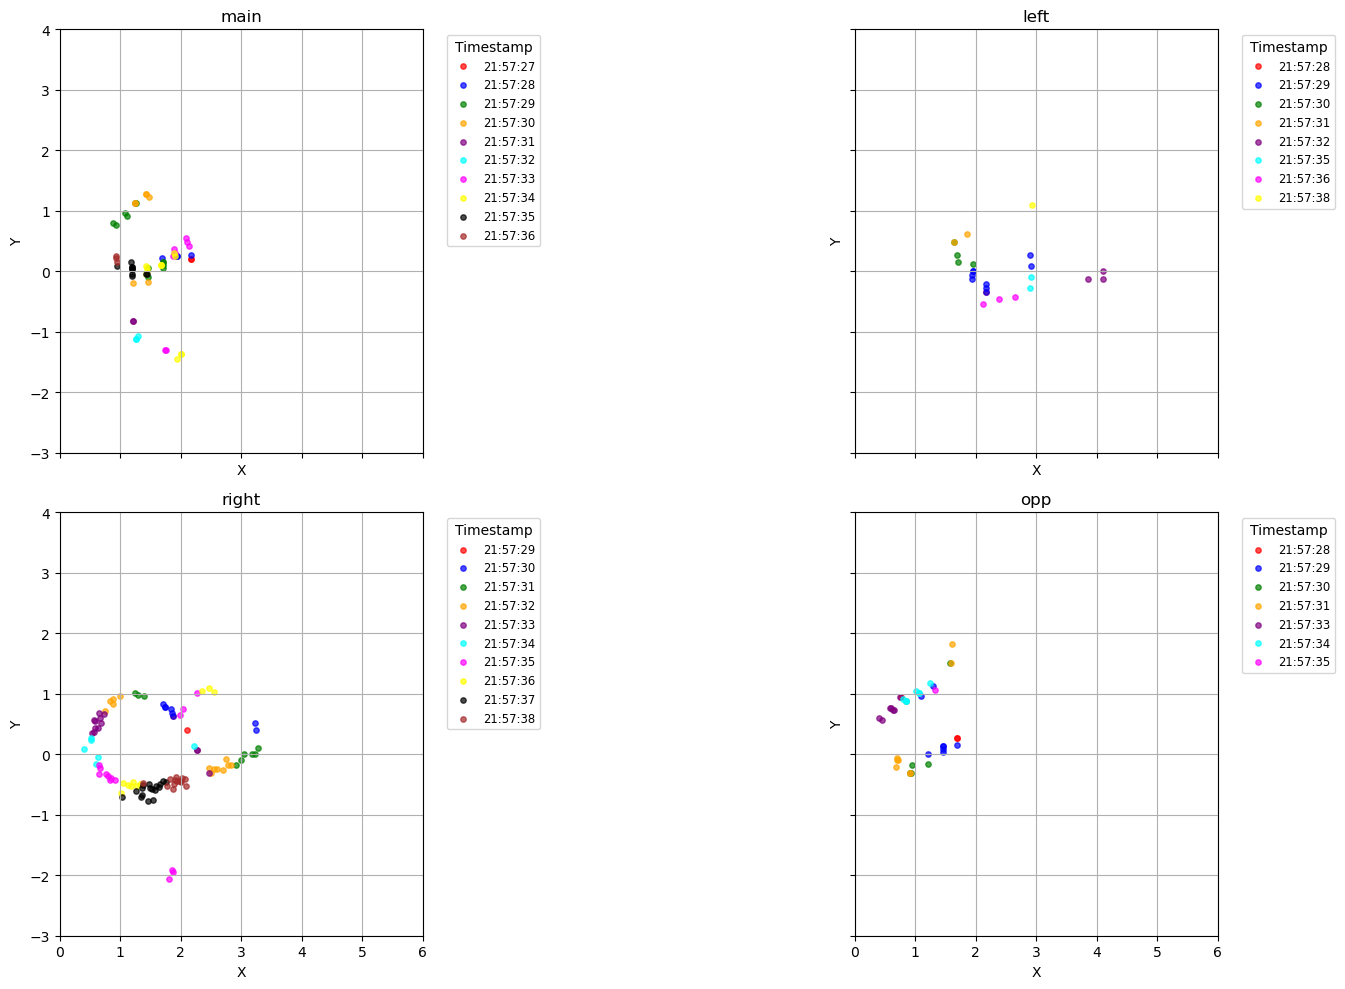

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

################# All plots without doppler #################

# === Configurable Zoom Ranges ===
# Set to None for auto-scaling
x_range = (0, 6)   # Example: (-1.0, 1.0) or None
y_range = (-3, 4)

# === Common suffix for all files ===
suffix = "cr6"

# === File paths ===
file_paths = {
    "main":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/koushik/{suffix}",
    "left":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/radar1/{suffix}",
    "right": f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi1/{suffix}",
    "opp":    f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/{suffix}"
}

# === Distinct colors for unique timestamps ===
distinct_colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'cyan', 'magenta', 'yellow', 'black', 'brown',
    'pink', 'lime', 'teal', 'navy', 'gold'
]

# === Create 2x3 subplots (only 5 will be used) ===
fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, (title, file_path) in enumerate(file_paths.items()):
    ax = axes[i]

    # Load raw data
    data = pd.read_csv(file_path, header=None)

    # === Filter out rows where 9th column == 8.000000 ===
    if data.shape[1] > 8:
        data = data[data.iloc[:, 8] != 8.000000]

    # Keep needed columns
    data = data.iloc[:, [3, 4, 5, -1]]  # X, Y, Z, Time
    data.columns = ['X', 'Y', 'Z', 'Time']

    # Convert time column
    data['Time'] = data['Time'].apply(lambda x: str(int(x)))
    data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d%H%M%S')

    # Create string version of time for labels
    data['Time_str'] = data['Time'].dt.strftime('%H:%M:%S')

    # Extract unique timestamps
    timestamps = data['Time'].unique()
    timestamps_str = data['Time_str'].unique()

    # Extend colors if needed
    if len(timestamps) > len(distinct_colors):
        colors = (distinct_colors * ((len(timestamps) // len(distinct_colors)) + 1))[:len(timestamps)]
    else:
        colors = distinct_colors[:len(timestamps)]

    # Plot each timestamp group
    for j, timestamp in enumerate(timestamps):
        subset = data[data['Time'] == timestamp]
        ax.scatter(subset['X'], subset['Y'],
                   color=colors[j],
                   label=timestamps_str[j],
                   alpha=0.7,
                   s=15)

    # === Styling ===
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')


    # Legend (move outside plot to avoid overlap)
    ax.legend(fontsize='small',
              title='Timestamp',
              bbox_to_anchor=(1.05, 1),
              loc='upper left')

    # Apply zoom ranges if defined
    if x_range:
        ax.set_xlim(x_range)
    if y_range:
        ax.set_ylim(y_range)

# Hide unused subplot (6th one)
if len(file_paths) < len(axes):
    axes[-1].axis('off')

# === Layout adjustment ===
plt.tight_layout()
# Save if needed
# plt.savefig("hover_plot_by_timestamp.png", dpi=300, bbox_inches='tight')
plt.show()



Chosen common timestamp: 20251013215730.2

main: (1.250485, 1.122115)
left: (1.702353, 0.160302)
right: (3.230409, 0.511274)
opp: (1.204951, -0.152669)

Radar Positions (Global Frame):
main: (X=0.00, Y=0.00)
left: (X=1.09, Y=2.82)
right: (X=1.76, Y=-2.11)
opp: (X=2.46, Y=0.97)


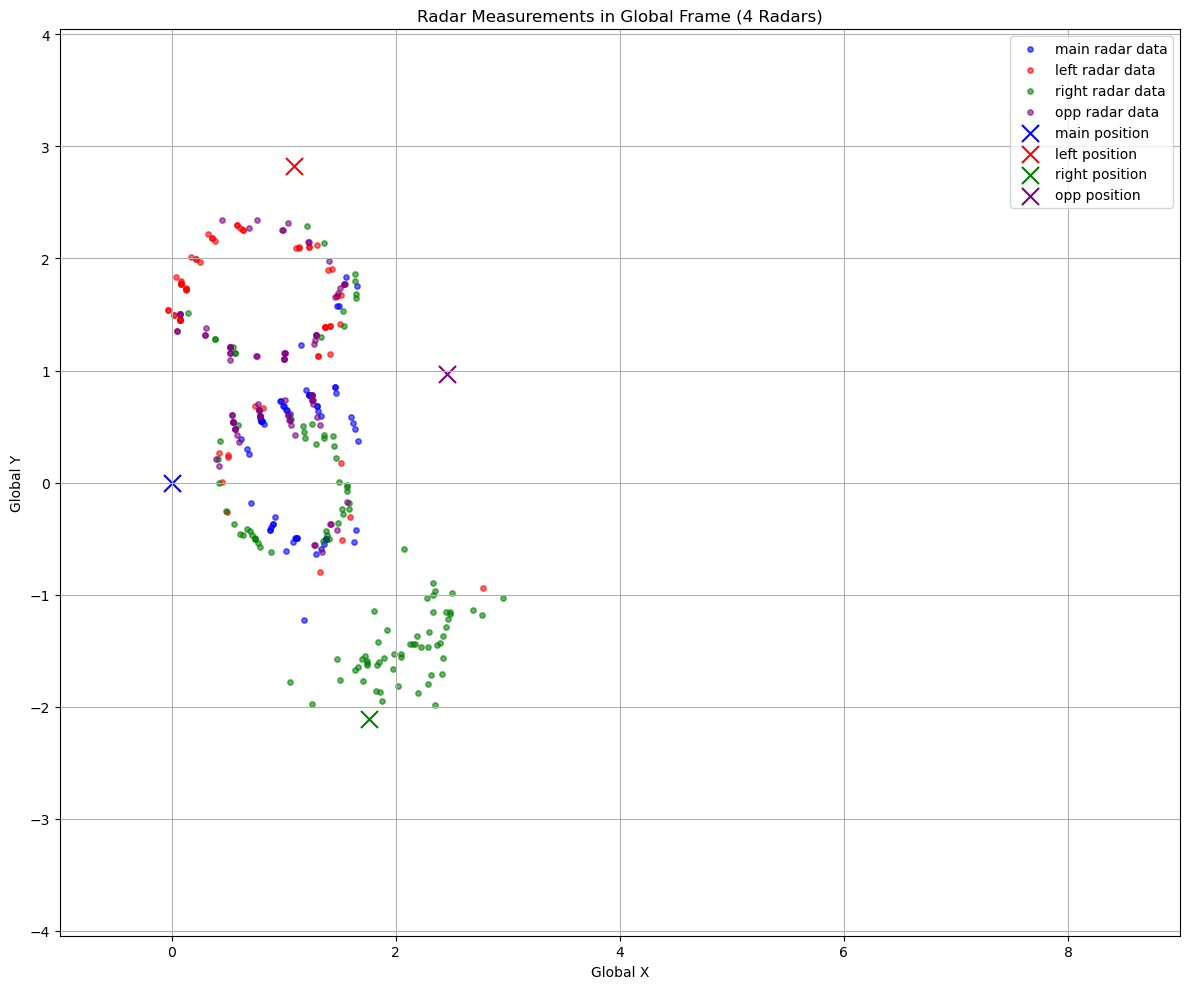

In [124]:
#############3         AUTOMATIC CALIBRATION
############################## DETECTION SECTION ##############################

# === Config ===
suffix_detect = "cr6"

# === File paths for detection ===
file_paths_detect = {
    "main":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/koushik/{suffix_detect}",
    "left":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/radar1/{suffix_detect}",
    "right":  f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi1/{suffix_detect}",
    "opp":    f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/{suffix_detect}"
}

# === Target timestamp (seconds only) ===
target_ts = "20251013215730"

def load_and_prepare(filepath, target_ts):
    df = pd.read_csv(filepath, header=None)
    df = df[df.iloc[:, 8] != 8.0]  # filter invalid
    ts_full = df.iloc[:, -1].astype(str)
    ts_sec = ts_full.str.split('.').str[0]
    ts_dec1 = ts_full.str.split('.').str[1].str[0]  # 1 decimal digit
    df = df[ts_sec == target_ts].copy()

    if df.empty:
        return None

    df["ts_match"] = ts_sec + "." + ts_dec1
    return df

# Load all radars
data_detect = {name: load_and_prepare(path, target_ts) for name, path in file_paths_detect.items()}

# Find common 1-digit sub-second timestamp
sets = [set(df["ts_match"]) for df in data_detect.values() if df is not None]
common_ts = set.intersection(*sets) if sets else set()

if not common_ts:
    raise ValueError("No common 1-digit sub-second timestamp found across radars.")

# Pick the earliest common one
chosen = sorted(common_ts)[0]
print(f"\nChosen common timestamp: {chosen}\n")

# Extract detections
known_detections = {}
for name, df in data_detect.items():
    if df is not None:
        subset = df[df["ts_match"] == chosen]
        if not subset.empty:
            x, y = subset.iloc[0, 3], subset.iloc[0, 4]
            known_detections[name] = (x, y)
            print(f"{name}: ({x:.6f}, {y:.6f})")
        else:
            print(f"{name}: not matched")
    else:
        print(f"{name}: not matched")

############################## CALIBRATION & VISUALIZATION ##############################

def compute_radar_position(D_main, D_other, side):
    x_d_other, y_d_other = D_other
    x_d_main, y_d_main = D_main
    if side == 'left':
        a = x_d_main - y_d_other
        b = y_d_main + x_d_other
    elif side == 'right':
        a = x_d_main + y_d_other
        b = y_d_main - x_d_other
    elif side == 'opp':
        a = x_d_main + x_d_other
        b = y_d_main + y_d_other
    else:
        raise ValueError(f"Unknown radar side: {side}")
    return a, b

def transform_points(x_local, y_local, a, b, side):
    if side == 'left':
        x_global = a + y_local
        y_global = b - x_local
    elif side == 'right':
        x_global = a - y_local
        y_global = b + x_local
    elif side == 'opp':
        x_global = a - x_local
        y_global = b - y_local
    else:
        raise ValueError(f"Unknown radar side: {side}")
    return x_global, y_global

def load_data(filepath):
    data = pd.read_csv(filepath, header=None)
    if data.shape[1] > 8:
        data = data[data.iloc[:, 8] != 8.000000]
    data = data.iloc[:, [3, 4, -1]]  # X, Y, Time
    data.columns = ['X', 'Y', 'Time']
    data['Time'] = data['Time'].apply(lambda x: str(int(x)))
    data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d%H%M%S')
    return data

# === File Paths ===
suffix_calib = "ccc6"
file_paths_calib = {
    "main":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/koushik/{suffix_calib}",
    "left":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/radar1/{suffix_calib}",
    "right":  f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi1/{suffix_calib}",
    "opp":    f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/{suffix_calib}"
}

# === Global transformation ===
global_data = {}
radar_positions = {}

x_main, y_main = 0.0, 0.0
global_data['main'] = load_data(file_paths_calib['main'])
radar_positions['main'] = (x_main, y_main)
global_data['main']['X_global'] = global_data['main']['X']
global_data['main']['Y_global'] = global_data['main']['Y']

sides = {'left': 'left', 'right': 'right', 'opp': 'opp'}

for name in ['left', 'right', 'opp']:
    data = load_data(file_paths_calib[name])
    D_m = known_detections['main']
    D_other = known_detections[name]
    side = sides[name]

    a, b = compute_radar_position(D_m, D_other, side)
    radar_positions[name] = (a, b)

    xg, yg = transform_points(data['X'], data['Y'], a, b, side)
    data['X_global'] = xg
    data['Y_global'] = yg
    global_data[name] = data

# === Plotting ===
plt.figure(figsize=(12, 10))
colors = {'main': 'blue', 'left': 'red', 'right': 'green', 'opp': 'purple'}

for name, data in global_data.items():
    plt.scatter(data['X_global'], data['Y_global'],
                label=f"{name} radar data", alpha=0.6, s=15, color=colors[name])

print("\nRadar Positions (Global Frame):")
for name, (x, y) in radar_positions.items():
    print(f"{name}: (X={x:.2f}, Y={y:.2f})")
    plt.scatter(x, y, marker='x', s=150, label=f"{name} position", color=colors[name])

plt.xlabel("Global X")
plt.ylabel("Global Y")
plt.title("Radar Measurements in Global Frame (4 Radars)")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()

x_range = (-1, 9)
y_range = (-5, 5)
if x_range: plt.xlim(x_range)
if y_range: plt.ylim(y_range)

plt.savefig("calibrated_4_radars.png", dpi=300)
plt.show()



Chosen common timestamp: 20251013215730.2

main: (1.250485, 1.122115)
left: (1.702353, 0.160302)
right: (3.230409, 0.511274)
opp: (1.204951, -0.152669)

Radar Positions (Global Frame):
main: (X=0.00, Y=0.00)
left: (X=1.09, Y=2.82)
right: (X=1.76, Y=-2.11)
opp: (X=2.46, Y=0.97)


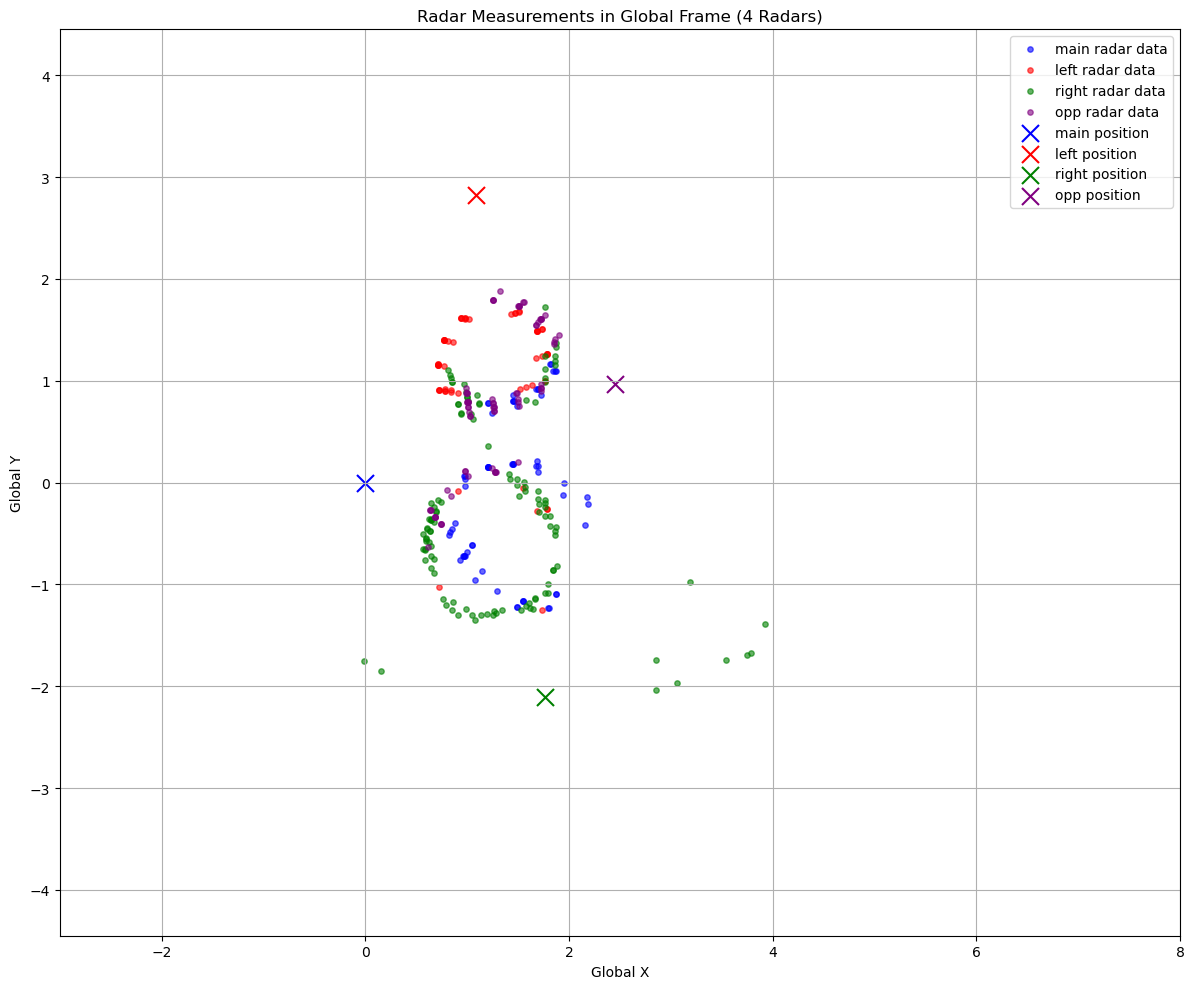

In [145]:
###################    AUTOMATIC CALIBRATION ANGLE FLEXIBILITY ###########################33

############################## DETECTION SECTION ##############################

# === Config ===
suffix_detect = "cr6"

# === File paths for detection ===
file_paths_detect = {
    "main":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/koushik/{suffix_detect}",
    "left":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/radar1/{suffix_detect}",
    "right":  f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi1/{suffix_detect}",
    "opp":    f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/{suffix_detect}"
}

# === Target timestamp (seconds only) ===
target_ts = "20251013215730"


def load_and_prepare(filepath, target_ts):
    df = pd.read_csv(filepath, header=None)
    df = df[df.iloc[:, 8] != 8.0]  # filter invalid detections

    ts_full = df.iloc[:, -1].astype(str)
    ts_sec = ts_full.str.split('.').str[0]
    ts_dec1 = ts_full.str.split('.').str[1].str[0]  # keep 1 decimal digit
    df = df[ts_sec == target_ts].copy()

    if df.empty:
        return None

    df["ts_match"] = ts_sec + "." + ts_dec1
    return df


# === Load detections ===
data_detect = {name: load_and_prepare(path, target_ts) for name, path in file_paths_detect.items()}

# Find common timestamps (1 decimal sub-second)
sets = [set(df["ts_match"]) for df in data_detect.values() if df is not None]
common_ts = set.intersection(*sets) if sets else set()

if not common_ts:
    raise ValueError("No common 1-digit sub-second timestamp found across radars.")

# Pick the earliest common timestamp
chosen = sorted(common_ts)[0]
print(f"\nChosen common timestamp: {chosen}\n")

# Extract detections (x,y) for each radar
known_detections = {}
for name, df in data_detect.items():
    if df is not None:
        subset = df[df["ts_match"] == chosen]
        if not subset.empty:
            x, y = subset.iloc[0, 3], subset.iloc[0, 4]
            known_detections[name] = (x, y)
            print(f"{name}: ({x:.6f}, {y:.6f})")
        else:
            print(f"{name}: not matched")
    else:
        print(f"{name}: not matched")


############################## CALIBRATION & VISUALIZATION ##############################

def rotation_matrix_deg(angle_deg):
    """Return a 2x2 rotation matrix (counter-clockwise)."""
    theta = np.deg2rad(angle_deg)
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])


def transform_points(x_local, y_local, angle_deg, t):
    """
    Rotate local (x_local, y_local) by angle_deg, then translate by vector t=[tx,ty].
    Returns x_global, y_global.
    """
    R = rotation_matrix_deg(angle_deg)
    coords = np.vstack((np.asarray(x_local), np.asarray(y_local)))
    rotated = R @ coords
    translated = rotated + t.reshape(2, 1)
    xg, yg = translated[0, :], translated[1, :]
    return xg, yg


def load_data(filepath):
    """Load radar CSV with columns: X, Y, Time."""
    data = pd.read_csv(filepath, header=None)
    if data.shape[1] > 8:
        data = data[data.iloc[:, 8] != 8.0]
    data = data.iloc[:, [3, 4, -1]]
    data.columns = ['X', 'Y', 'Time']
    data['Time'] = data['Time'].apply(lambda x: str(int(x)))
    data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d%H%M%S')
    return data


# === File paths for calibration data ===
suffix_calib = "cc5"
file_paths_calib = {
    "main":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/koushik/{suffix_calib}",
    "left":   f"/home/koushikk/Master_Thesis/13oct/13-10-25/radar1/{suffix_calib}",
    "right":  f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi1/{suffix_calib}",
    "opp":    f"/home/koushikk/Master_Thesis/13oct/13-10-25/rpi2/{suffix_calib}"
}

# === Load main radar data ===
global_data = {}
radar_positions = {}

global_data['main'] = load_data(file_paths_calib['main'])
radar_positions['main'] = np.array([0.0, 0.0])  # origin
global_data['main']['X_global'] = global_data['main']['X']
global_data['main']['Y_global'] = global_data['main']['Y']


# === Define relative rotations and translations ===
# Adjust these empirically to align the radar views properly
sides = {
    'left':  {'angle': -90},   # left radar rotated 90° CCW relative to main
    'right': {'angle': +90},   # right radar rotated 90° CW relative to main
    'opp':   {'angle': 180}    # opposite radar rotated 180° relative to main
}

# === Compute translations using detection reference points ===
for name in ['left', 'right', 'opp']:
    data = load_data(file_paths_calib[name])

    D_main = np.array(known_detections['main'])
    D_other = np.array(known_detections[name])
    angle = sides[name]['angle']

    # Transform D_other to global and compute translation t
    R = rotation_matrix_deg(angle)
    D_other_rot = R @ D_other.reshape(2, 1)
    t = D_main.reshape(2, 1) - D_other_rot
    t = t.flatten()

    radar_positions[name] = t
    xg, yg = transform_points(data['X'], data['Y'], angle, t)
    data['X_global'] = xg
    data['Y_global'] = yg
    global_data[name] = data


############################## VISUALIZATION ##############################

plt.figure(figsize=(12, 10))
colors = {'main': 'blue', 'left': 'red', 'right': 'green', 'opp': 'purple'}

# Plot radar point clouds
for name, data in global_data.items():
    plt.scatter(data['X_global'], data['Y_global'],
                label=f"{name} radar data", alpha=0.6, s=15, color=colors[name])

# Plot radar positions
print("\nRadar Positions (Global Frame):")
for name, pos in radar_positions.items():
    x, y = pos
    print(f"{name}: (X={x:.2f}, Y={y:.2f})")
    plt.scatter(x, y, marker='x', s=150, color=colors[name], label=f"{name} position")

plt.xlabel("Global X")
plt.ylabel("Global Y")
plt.title("Radar Measurements in Global Frame (4 Radars)")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.xlim(-3, 8)
plt.ylim(-5, 5)
plt.savefig("calibrated_4_radars.png", dpi=300)
plt.show()
